In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

#### 데이터 준비
* 각 변수의 의미 파악
* 각 변수의 데이터 유형
* 각 변수의 분포와 특성 파악
* 결측치/이상치 파악
* 집값 예측을 위한 후보변수 선택

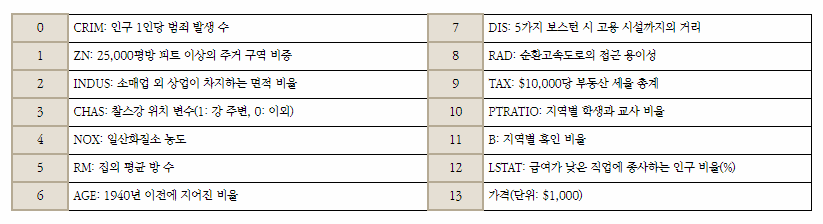

In [157]:
df = pd.read_csv('data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 데이터 탐색

In [158]:
# 데이터 타입, 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [159]:
cat_cols = ['CHAS']
num_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

len(num_cols)

12

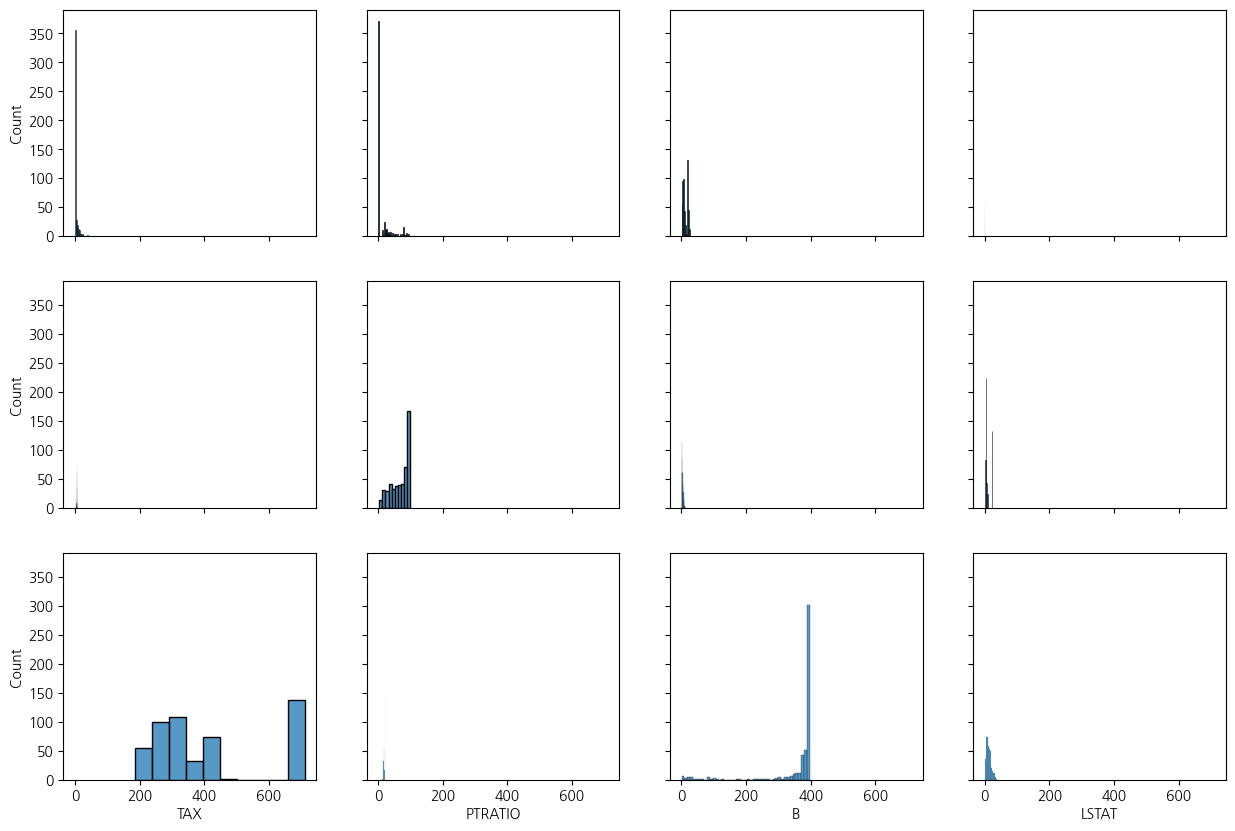

In [160]:
# ---------------
# 수치형 변수의 분포
# ---------------
fig, ax = plt.subplots(3,4, figsize=(15,10), sharex=True, sharey=True)
axes=ax.flatten()
for i, feature in enumerate(num_cols):
    sns.histplot(x=feature, data=df, ax=axes[i])

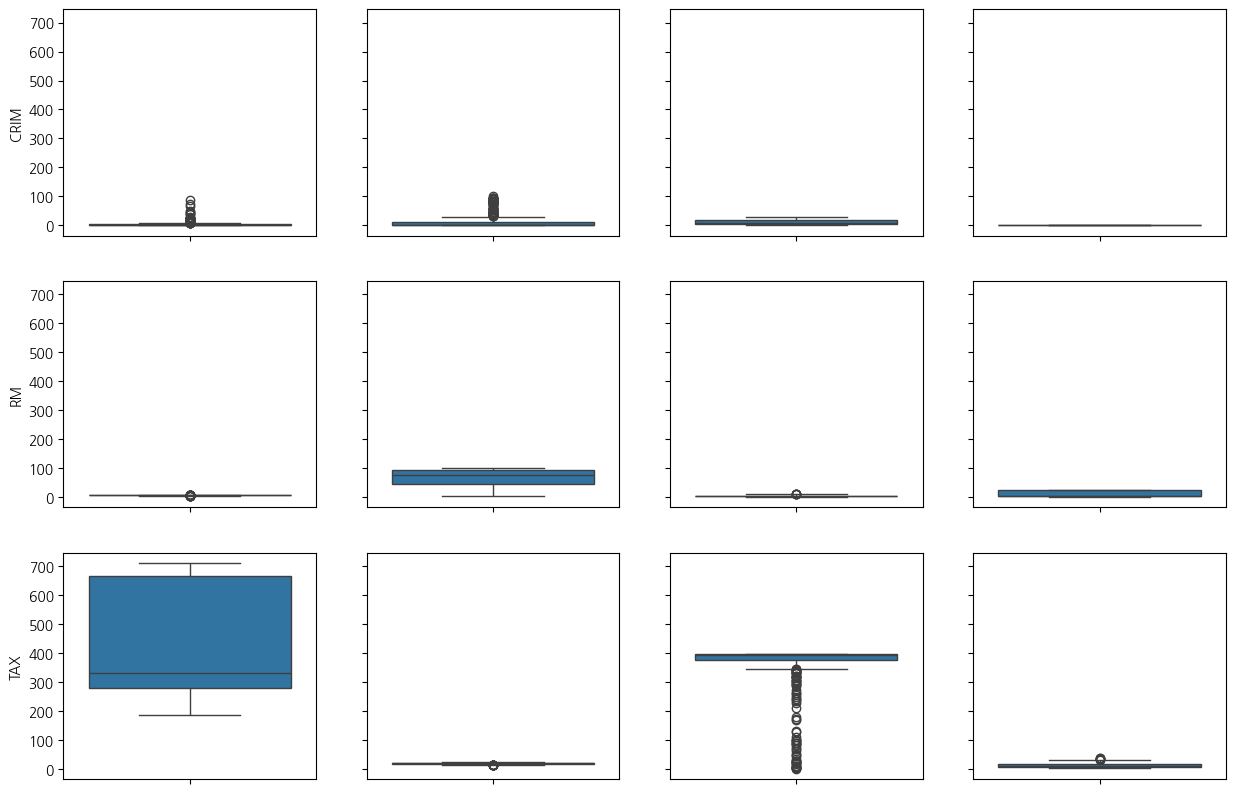

In [161]:
fig, ax = plt.subplots(3,4, figsize=(15,10), sharex=True, sharey=True)
axes=ax.flatten()
for i, feature in enumerate(num_cols):
    sns.boxplot(y=feature, data=df, ax=axes[i])

<Axes: xlabel='CHAS', ylabel='count'>

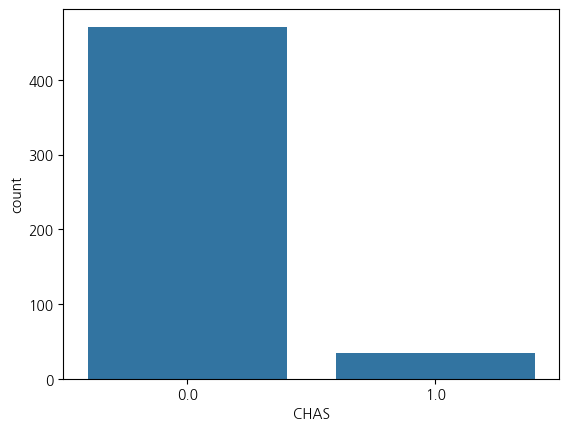

In [162]:
# ---------------
# 범주형 변수의 빈도수
# ---------------
sns.countplot(x='CHAS', data=df)

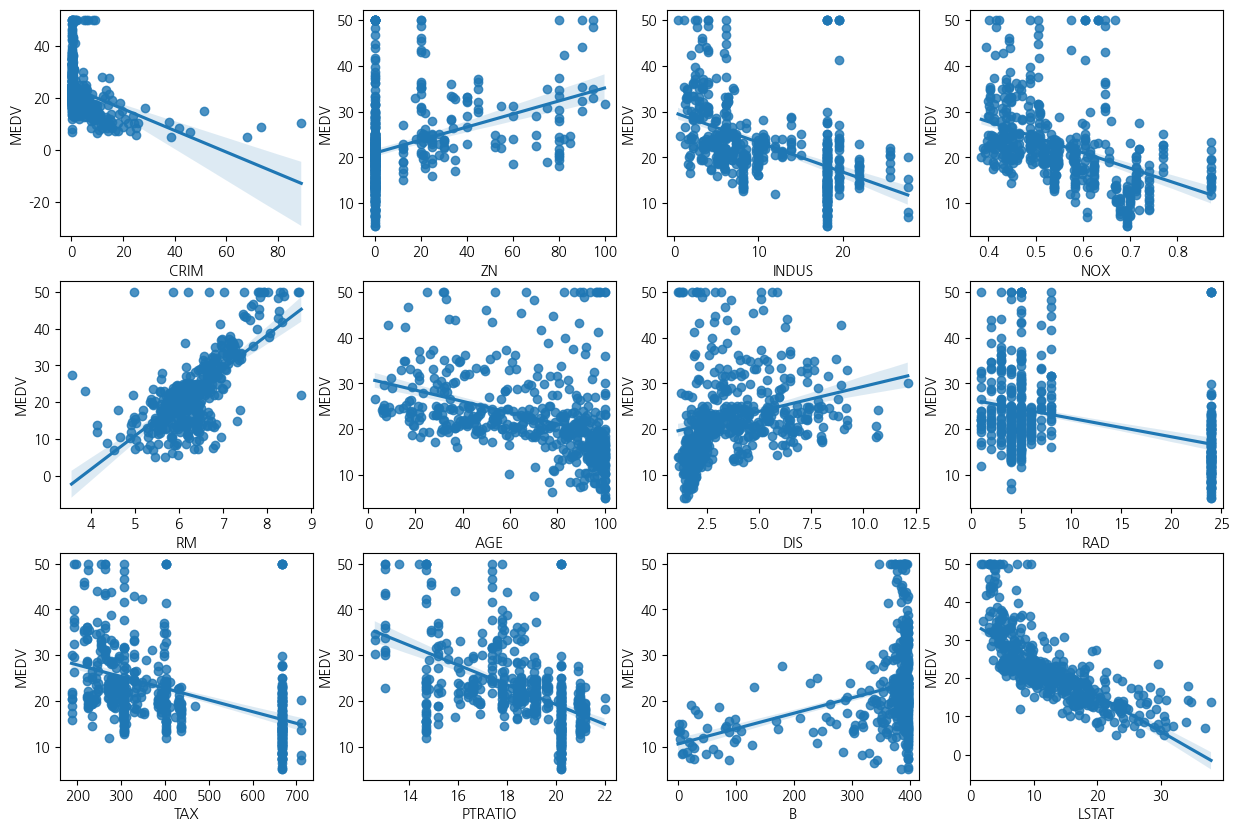

In [163]:
# ---------------
# 종속변수와의 상관관계
# ---------------
fig, ax = plt.subplots(3,4, figsize=(15,10))
axes=ax.flatten()
for i, feature in enumerate(num_cols):
    sns.regplot(x=feature, y='MEDV', data=df, ax=axes[i])

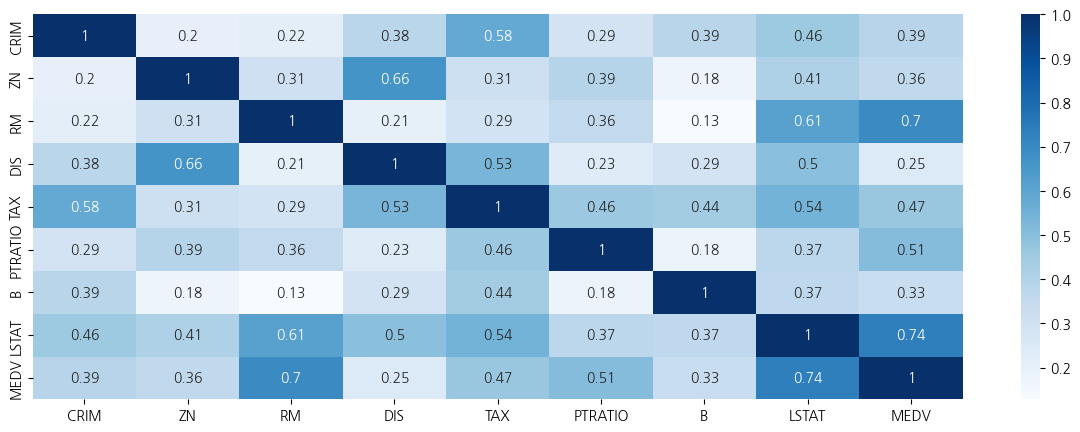

In [164]:
corr = abs(df.drop(['CHAS','INDUS','NOX','AGE','RAD'], axis=1).corr())

plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='Blues');

<Axes: xlabel='CHAS', ylabel='MEDV'>

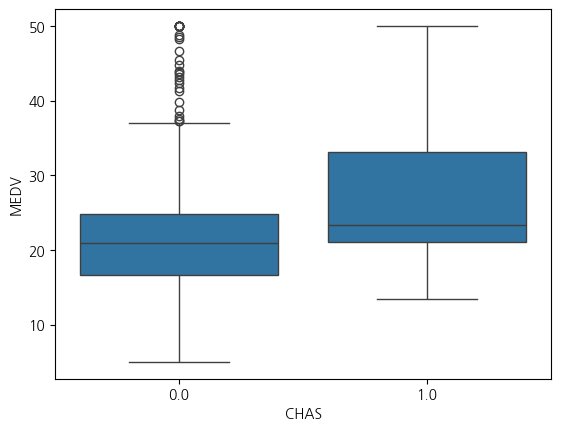

In [165]:
sns.boxplot(x='CHAS', y='MEDV', data=df)



#### 변수 선택

In [166]:
# 독립변수, 종속변수 선택
X = df[['CRIM','ZN','RM','DIS','TAX','PTRATIO','B','LSTAT','CHAS']]
y = df['MEDV']

#### 훈련세트, 테스트세트 분할

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 9), (127, 9), (379,), (127,))

#### 데이터 전처리 - 스케일링

In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(test_scaled, columns=X_test.columns, index=X_test.index)

In [172]:
X_train_preprocessed = pd.concat([X_train_scaled, X_train['CHAS']], axis=1)
X_test_preprocessed = pd.concat([X_test_scaled, X_test['CHAS']], axis=1)

#### 모델 생성

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5)
model.fit(X_train_preprocessed, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
test_r2 = model.score(X_test_preprocessed, y_test)
train_r2 = model.score(X_train_preprocessed, y_train)

print(f'test_r2:{test_r2}')
print(f'train_r2:{train_r2}')

test_r2:0.8258761678506035
train_r2:0.9438343029966564


In [ ]:
# 테스트세트로 예측 
y_pred = model.predict(X_test_preprocessed)

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'r2:{r2}')
print(f'mae:{mae}')
print(f'rmse:{rmse}')

r2:0.8258761678506035
mae:2.4232372981436066
rmse:3.623727583882149
